In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Exploratiy Data Analysis

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum().any()

False

In [5]:
df.shape

(21597, 21)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='price'>

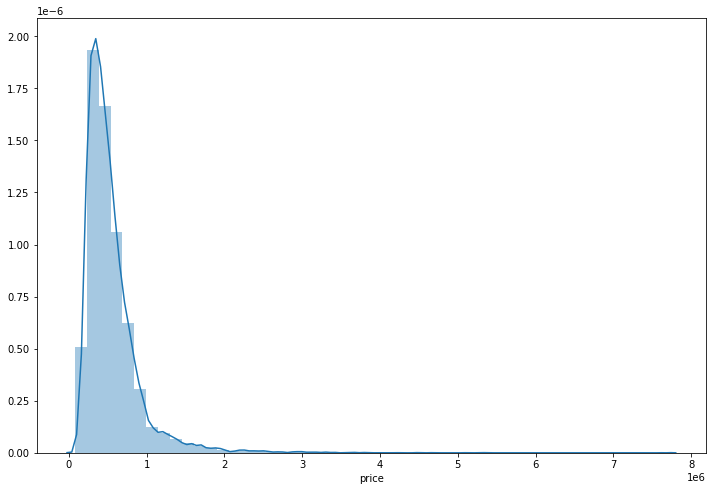

In [7]:
plt.figure(figsize = (12, 8))
sns.distplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

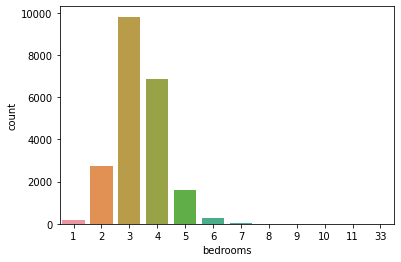

In [8]:
sns.countplot(df['bedrooms'])

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [10]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

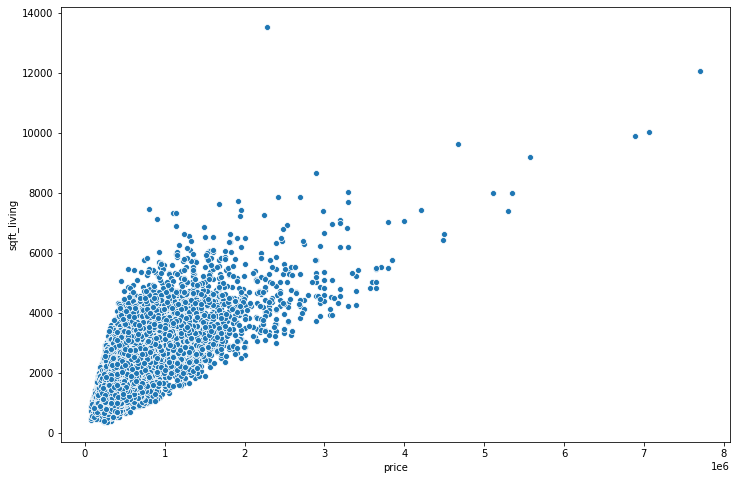

In [11]:
plt.figure(figsize = (12, 8))
sns.scatterplot('price', 'sqft_living', data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

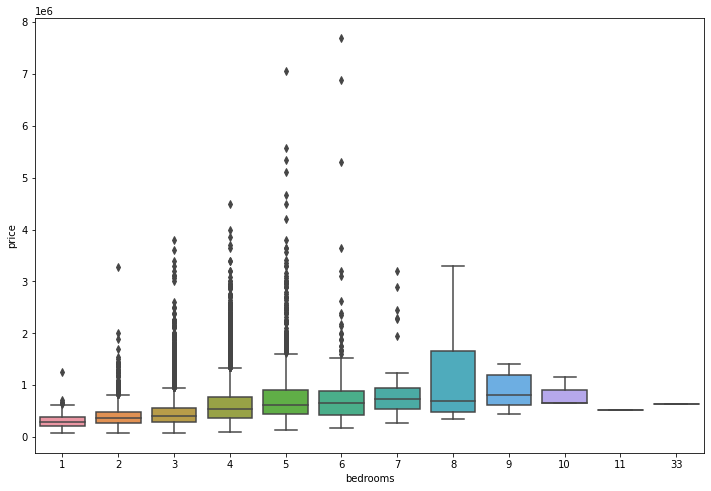

In [12]:
plt.figure(figsize = (12, 8))
sns.boxplot('bedrooms', 'price', data = df)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='long'>

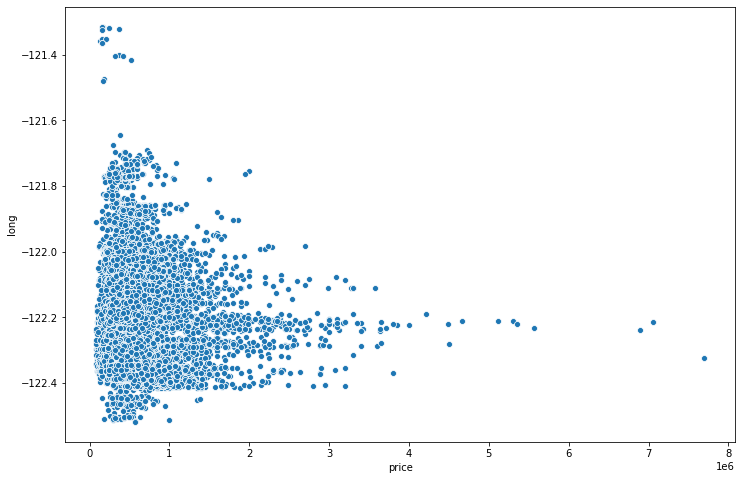

In [14]:
plt.figure(figsize = (12, 8))
sns.scatterplot('price', 'long', data = df)

<AxesSubplot:xlabel='price', ylabel='lat'>

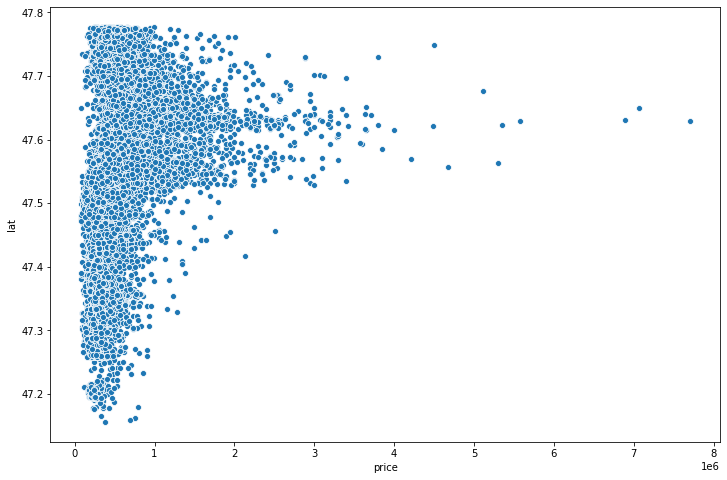

In [15]:
plt.figure(figsize = (12, 8))
sns.scatterplot('price', 'lat', data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

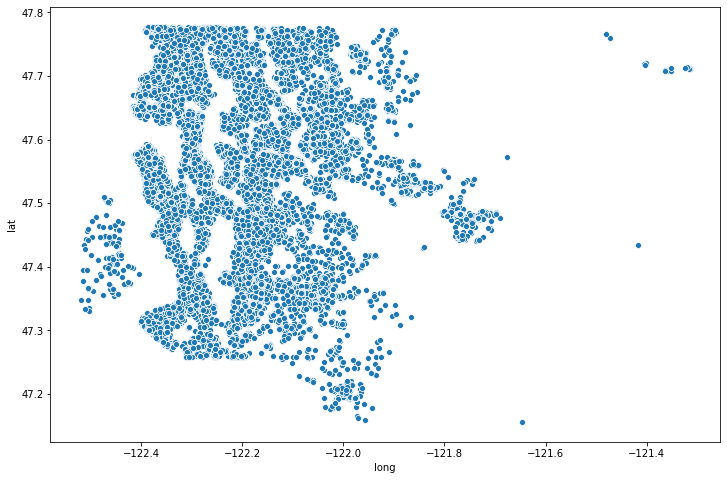

In [16]:
plt.figure(figsize = (12, 8))
sns.scatterplot('long', 'lat', data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

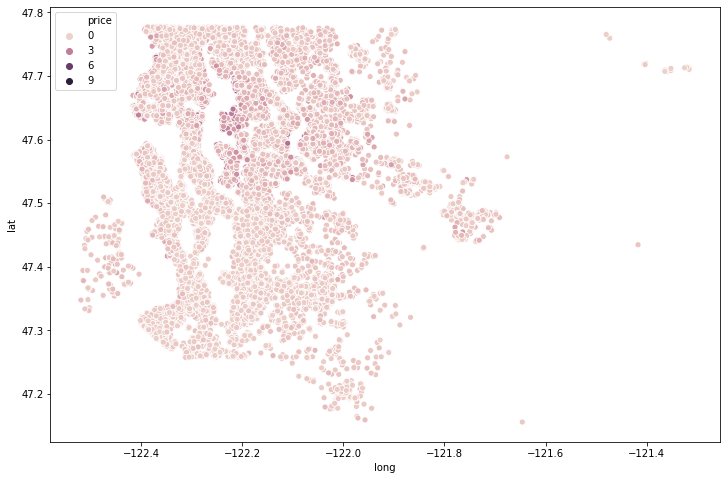

In [17]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')

In [18]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [19]:
len(df)

21597

In [20]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

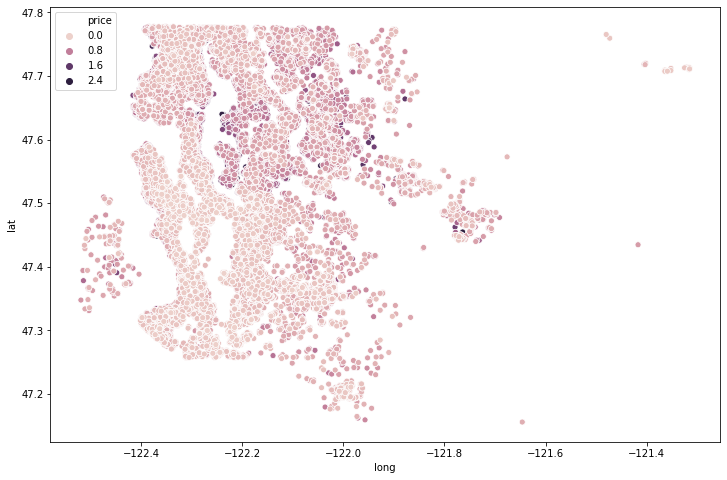

In [21]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price')

<AxesSubplot:xlabel='long', ylabel='lat'>

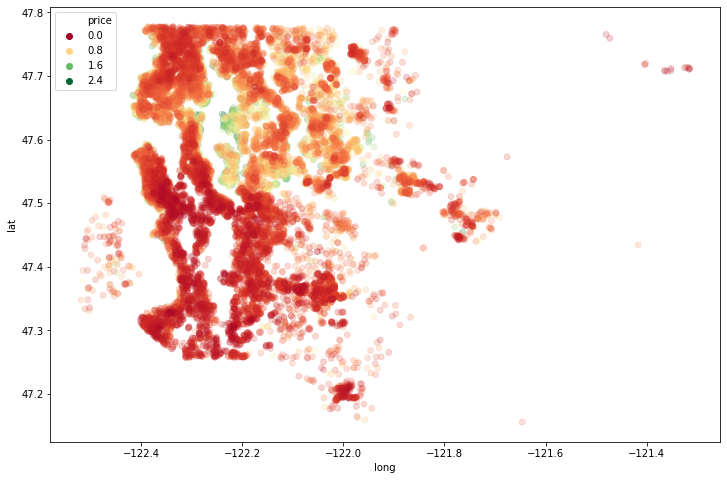

In [22]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price',
               palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

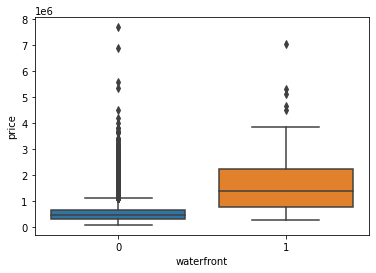

In [23]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

## Feature Engineering

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df = df.drop('id', axis = 1)

In [26]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [29]:
df['year'] = df['date'].apply(lambda x : x.year)
df['month'] = df['date'].apply(lambda x : x.month)

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

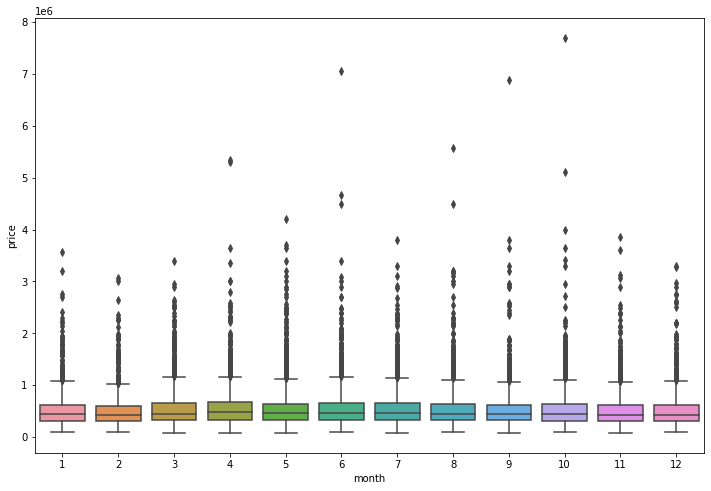

In [33]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'month', y = 'price', data = df)

<AxesSubplot:xlabel='month'>

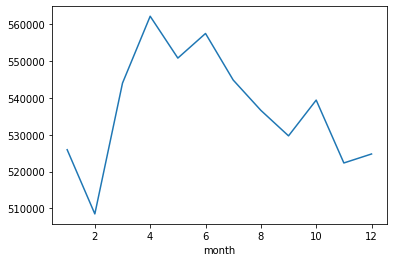

In [37]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

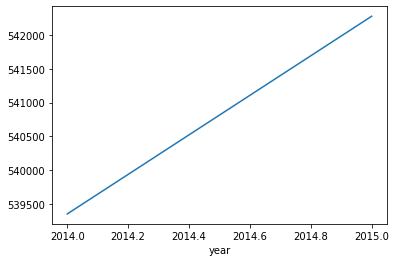

In [38]:
df.groupby('year').mean()['price'].plot()

In [39]:
df = df.drop('date', axis = 1)

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [41]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [42]:
df = df.drop('zipcode', axis = 1)

In [43]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [44]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Split and Scale Data

In [45]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model with TF

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
X_train.shape

(15117, 19)

In [54]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1,))

model.compile(optimizer = 'adam', loss = 'mse')

In [55]:
model.fit(x = X_train, y = y_train, 
          validation_data = (X_test, y_test),
         batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430244102144.0000 - val_loss: 418937700352.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 429438304256.0000 - val_loss: 416103071744.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 418236006400.0000 - val_loss: 390374817792.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 361284042752.0000 - val_loss: 295139737600.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 229414830080.0000 - val_loss: 148611039232.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 118008176640.0000 - val_loss: 96561463296.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 98529943552.0000 - val_loss: 94376042496.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 96847527936.0000 - val_loss: 92957016064.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33192400896.0000 - val_loss: 31692818432.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33098823680.0000 - val_loss: 31692032000.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 33085241344.0000 - val_loss: 31711946752.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33035890688.0000 - val_loss: 31566014464.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 33025052672.0000 - val_loss: 31504988160.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 33028153344.0000 - val_loss: 31471642624.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 33004990464.0000 - val_loss: 31442319360.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32953430016.0000 - val_loss: 31398305792.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 30631366656.0000 - val_loss: 28733292544.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30646022144.0000 - val_loss: 28774590464.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 30687635456.0000 - val_loss: 28747671552.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 30592569344.0000 - val_loss: 28717936640.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30565513216.0000 - val_loss: 28662441984.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30596538368.0000 - val_loss: 28631615488.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30593476608.0000 - val_loss: 28634058752.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30526812160.0000 - val_loss: 28943460352.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29126273024.0000 - val_loss: 26795376640.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29088256000.0000 - val_loss: 26788751360.0000


In [58]:
model.history.history

{'loss': [430244102144.0,
  429438304256.0,
  418236006400.0,
  361284042752.0,
  229414830080.0,
  118008176640.0,
  98529943552.0,
  96847527936.0,
  95336194048.0,
  93769875456.0,
  92195938304.0,
  90581639168.0,
  88876687360.0,
  87147569152.0,
  85346402304.0,
  83489357824.0,
  81545330688.0,
  79495495680.0,
  77399269376.0,
  75250032640.0,
  73034186752.0,
  70808723456.0,
  68454674432.0,
  66154651648.0,
  63863967744.0,
  61679099904.0,
  59667746816.0,
  57784537088.0,
  56165998592.0,
  54752043008.0,
  53503655936.0,
  52466331648.0,
  51589718016.0,
  50805985280.0,
  50168135680.0,
  49600024576.0,
  49075396608.0,
  48636653568.0,
  48170070016.0,
  47745863680.0,
  47348424704.0,
  46994477056.0,
  46625017856.0,
  46227197952.0,
  45857132544.0,
  45481299968.0,
  45097738240.0,
  44703174656.0,
  44309401600.0,
  43978850304.0,
  43571642368.0,
  43194183680.0,
  42875858944.0,
  42539888640.0,
  42252054528.0,
  41976799232.0,
  41706192896.0,
  41494986752.0,


In [60]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

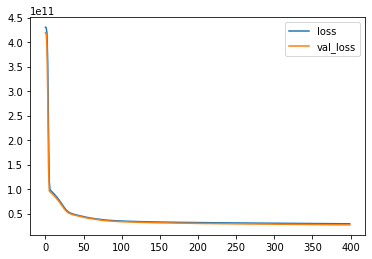

In [62]:
losses.plot()

## Evaluation

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [67]:
predictions = model.predict(X_test)

In [68]:
predictions

array([[406732.22],
       [581557.94],
       [583190.3 ],
       ...,
       [393990.66],
       [566031.6 ],
       [673748.5 ]], dtype=float32)

In [69]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [71]:
eval_metrics(y_test, predictions)

r2_score: 0.7979981908467965 
 mae: 101262.76279538001 
 mse: 26788755546.63657 
 rmse: 163672.7086188671


In [72]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [73]:
5.402966e+05

540296.6

In [74]:
explained_variance_score(y_test, predictions)

0.7980676898992569

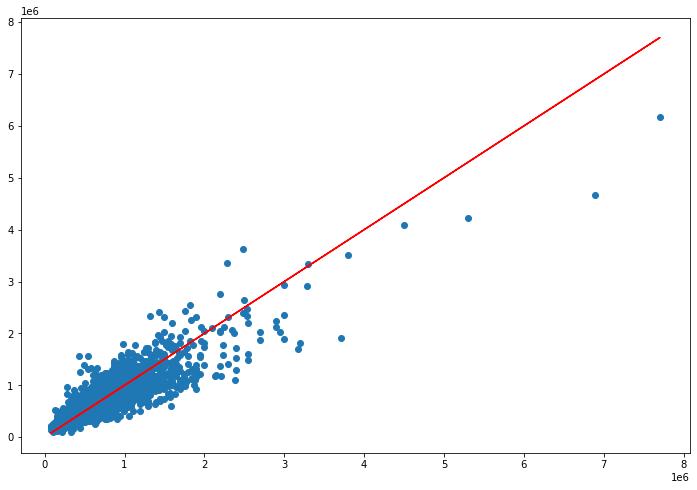

In [78]:
plt.figure(figsize = (12, 8))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

## Predicting the values

In [79]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [81]:
df.drop('price', axis = 1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [82]:
single_house = df.drop('price', axis = 1).iloc[0]

In [84]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [86]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [87]:
scaler.transform(single_house.values.reshape(-1, 19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [88]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [89]:
model.predict(single_house)

array([[289879.97]], dtype=float32)

In [90]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
